# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

# Downlaod Files:

* https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Import Power Transform
from sklearn.preprocessing import PowerTransformer

#Import Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

#Import StandardScaler
from sklearn.preprocessing import StandardScaler

#Improt Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import SMOTE
from imblearn.over_sampling import SMOTE

#Import PCA
from sklearn.decomposition import PCA

#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split

#Importing GridSearchCV to Tune model.
from sklearn.model_selection import GridSearchCV

#Import Pickle to save model
import pickle

In [2]:
#Read dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Checking shape of dataset
df.shape

(7043, 21)

* We have 7043 rows and 21 columns in this dataset.

In [4]:
#Checking columns of the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Feature Description:

* Churn - Whether the customer churned or not (Yes or No).
* Tenure - Number of months the customer has been with the company.
* Monthly Charges - The monthly amount charged to the customer.
* Total Charges - The total amount charged to the customer.
* Customer ID - An unique ID that identify each customer.
* Gender - The customer's gender: Male or Female.
* Senior Citizen - Whether the customer is a senior citizen or not.(0,1)
* Partner - Whether the customer has a partner or not.(Yes or No)
* Dependents - Whether customer has dependents or not. (Yes or No)
* PhoneService - Whether the custoner has a phone service or not (Yes or No)
* MultipleLines - Whether the customer has multiple lines or not(Yes, No, No Phone Service)
* Internet Service - Customer's internet service type (DSL, Fiber optic, None)
* Online Security - Whether the customer has online security add-on (Yes, No, No Internet Service)
* Online Backup - Whether the customer has online backup add-on (Yes, No, No Internet Service)
* Device Protection - Whether the customer has device protection add-on (Yes, No, No Internet Service)
* Tech Support - Whether the customer has tech support add on (Yes, No, No Internet Service)
* Streaming TV - Whether the customer has streaming TV or not (Yes, No, No Internet Service)
* Streaming Movies - Whether the customer has streaming movies or not (Yes, No, No Interner Service)
* Contract - Team of the customer's contract (Monthly, 1-Year, 2-Year)
* Paperless Billing - Whether the customer has paperless billing or not (Yes, No)
* Payment Method - The customer's payment method (E-check, mailed check, bank transfer (auto), credit card (auto)).

In [5]:
#Checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* No null value present in the dataset.
* 1 float type data, 2 int type data and 18 categorical data.
* Total charges are in object data type this maybe for spaces or special characters. Will analyze more regarding same.

In [6]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

* There are some empty obsrvations.

In [7]:
#Checking for empty observations
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#Let's fill the empty observations with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [9]:
#Let's check if there are null values present
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* We have 11 missing observations in Total Charges.

In [10]:
#Will convert Total charges into float type
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [11]:
#Treating missing values with mean imputation technique
df['TotalCharges'] = df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [12]:
#Checking null values again
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* No missing balue in dataset now.

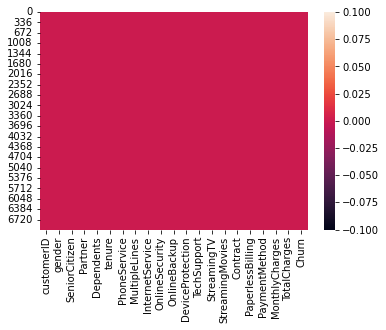

In [13]:
#Visualizing null values
sns.heatmap(df.isnull())
plt.show()

In [14]:
#Checking the unique value counts of each feature
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
#Dropping CustomerID as its not relevant 
df = df.drop(['customerID'], axis = 1)

In [16]:
#Different types of variables are Categorical , ordinal and numerical.
num_cols = ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'tenure']
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'InternetService',
           'PaymentMethod', 'Contract']

In [17]:
#Checking stats of dataset
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* All columns have 7043 count hence no missing values.
* For Categorical data we have Top Value and it's frequency shown in the table above.
* Most customer use phone service in the dataset.
* Most customer prefer Paperless illing over other options.
* Maximum monthly charge is upto 118.75 and maximum Total charges is upto 8684.8.
* According to our dataset customer attrition is lesser than retention.
* Mean and median of numerical columns are different.

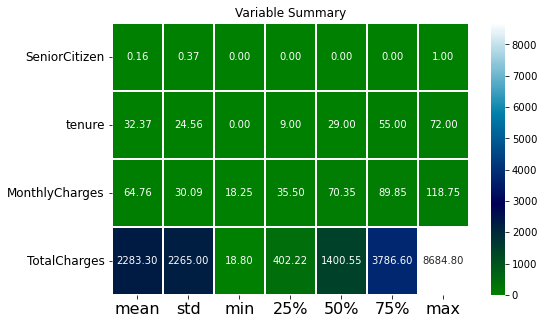

In [18]:
#Heatmap of describe function
plt.figure(figsize = (8,5))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot = True, fmt = '.2f', cmap = 'ocean')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 12)
plt.title('Variable Summary')
plt.show()

* Total Charges have some outliers present.

# Univariate Analysis

<Figure size 576x288 with 0 Axes>

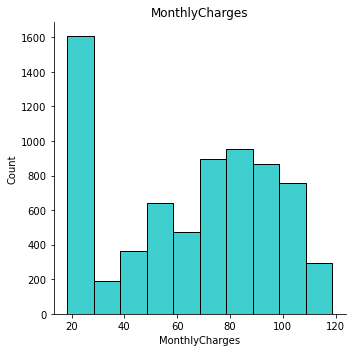

<Figure size 576x288 with 0 Axes>

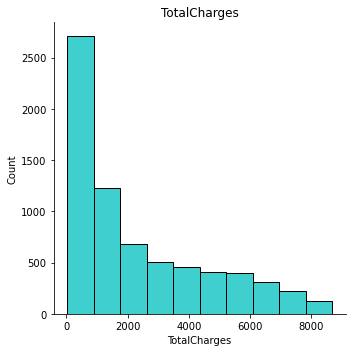

<Figure size 576x288 with 0 Axes>

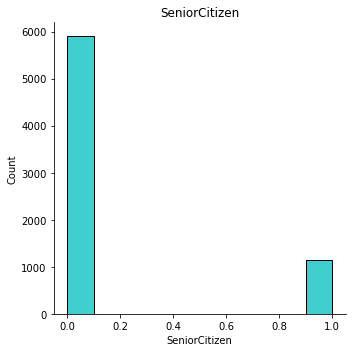

<Figure size 576x288 with 0 Axes>

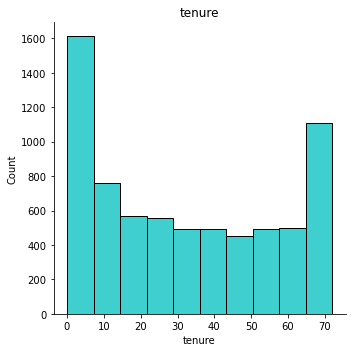

In [19]:
#Distribution plot for all numerical columns
for i in df[num_cols]:
    plt.figure(figsize = (8,4))
    sns.displot(df[i], bins = 10, color = 'c')
    plt.title(i)
    plt.tight_layout()

* I can see some skewness in TotalCharges and MonthlyCharges. Senior Citizen is a categorical data and tenure has a symmetrical distribution.

In [20]:
#Will split the categorical columns into small similar groups
gpd = ['gender', 'Partner', 'Dependents', 'Churn']
pmo = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup']
dts = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
bill = ['PaperlessBilling', 'InternetService', 'PaymentMethod', 'Contract']

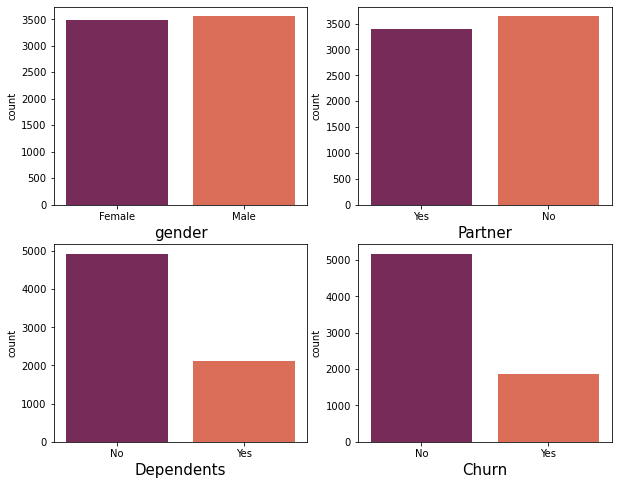

In [21]:
#The count of data for columns
plt.figure(figsize = (10,8))
plotnumber = 1

for i in df[gpd]:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(df[i], palette = 'rocket')
        plt.xlabel(i, fontsize = 15)
    plotnumber += 1   
    
plt.show()

In [22]:
#Checking unique values of categorical columns
for i in df[gpd]:
    print(df[i].value_counts())
    print('***************************************')
    print('                   ')    

Male      3555
Female    3488
Name: gender, dtype: int64
***************************************
                   
No     3641
Yes    3402
Name: Partner, dtype: int64
***************************************
                   
No     4933
Yes    2110
Name: Dependents, dtype: int64
***************************************
                   
No     5174
Yes    1869
Name: Churn, dtype: int64
***************************************
                   


* Male counts are slighly higher than female.
* No Partner count is more than Partner
* Most of the customers do not have dependents.
* Customer retention count is more than attrition. 

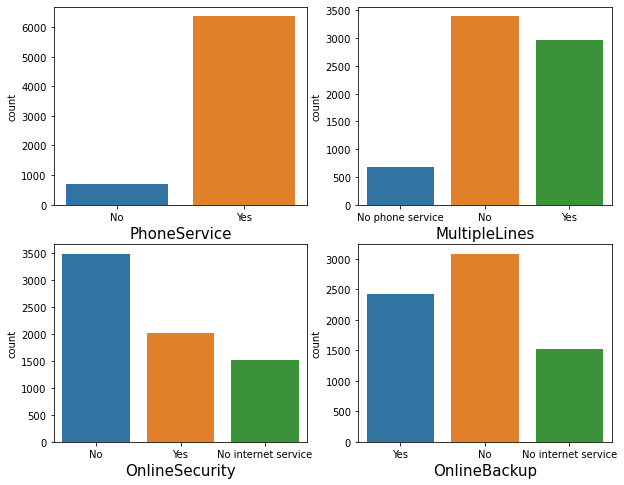

In [23]:
#Count of Categorical columns
plt.figure(figsize = (10,8))
plotnumber = 1

for i in df[pmo]:
    if plotnumber <= 4:
        ax = plt.subplot(2,2, plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i, fontsize = 15)
        
    plotnumber += 1
    
plt.show()

In [24]:
#Checking unique values of categorical columns
for i in df[pmo]:
    print(df[i].value_counts())
    print('*********************************************')
    print('                     ')

Yes    6361
No      682
Name: PhoneService, dtype: int64
*********************************************
                     
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
*********************************************
                     
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
*********************************************
                     
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
*********************************************
                     


* Almost 80% of custoners use phone services.
* Most of the customers do not have multiple lines.
* Many customer did not opt for Online security and online backup.
* Only few customers do not have phone or internet service.

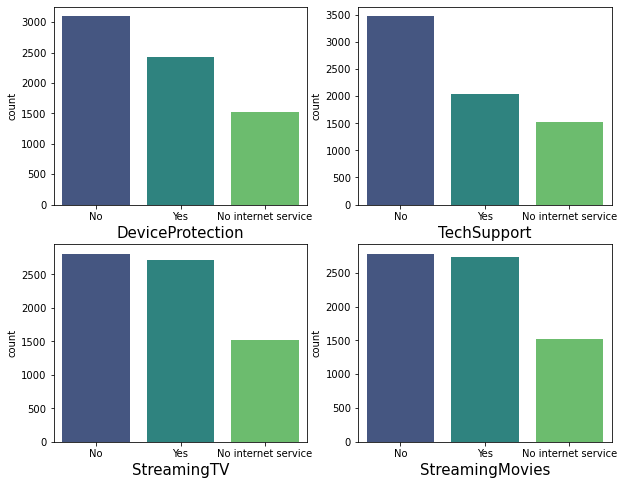

In [25]:
#Count of Categorical columns
plt.figure(figsize = (10,8))
plotnumber = 1

for i in df[dts]:
    if plotnumber <= 4:
        ax = plt.subplot(2,2, plotnumber)
        sns.countplot(df[i], palette = 'viridis')
        plt.xlabel(i, fontsize = 15)
        
    plotnumber += 1
    
plt.show()

In [26]:
#Checking unique values of categorical columns
for i in df[dts]:
    print(df[i].value_counts())
    print('*********************************************')
    print('                     ')

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
*********************************************
                     
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
*********************************************
                     
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
*********************************************
                     
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
*********************************************
                     


* There are many customers did not opt for device protection.
* Many customers did not add-on tech support service.
* There is a pattern of slightly more for No than yes for streaming TV.
* Same pattern for Streaming movies as well.

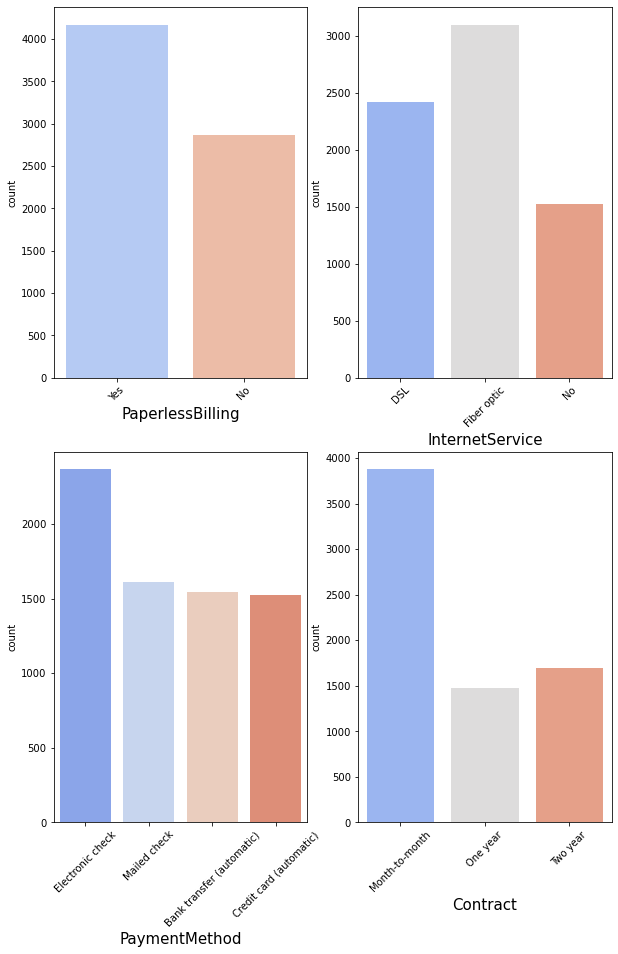

In [27]:
#Count of Categorical columns
plt.figure(figsize = (10,15))
plotnumber = 1

for i in df[bill]:
    if plotnumber <= 4:
        ax = plt.subplot(2,2, plotnumber)
        sns.countplot(df[i], palette = 'coolwarm')
        plt.xlabel(i, fontsize = 15)
        plt.xticks(rotation = 45)
        
    plotnumber += 1
    
plt.show()

In [28]:
#Checking unique values of categorical columns
for i in df[bill]:
    print(df[i].value_counts())
    print('*********************************************')
    print('                     ')

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
*********************************************
                     
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
*********************************************
                     
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
*********************************************
                     
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
*********************************************
                     


* Most of the customers prefer paperless billing.
* Fiber optic is used by many customers than DSL.
* Electronic check is used by more customers than mailed check, automatic bank transfer and credit transfer.
* Most of the customers have contract month on month.

# Bivariate Analysis

In [29]:
#Will plot a stacked plot of categorical columns with target
def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size() / df.groupby(group)[target].count()).reset_index().pivot(columns = target, index = group, values = 0)
    temp_df.plot(kind = 'bar', stacked = True, ax = ax, color = ["pink", "green"])
    ax.xaxis.set_tick_params(rotation = 0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

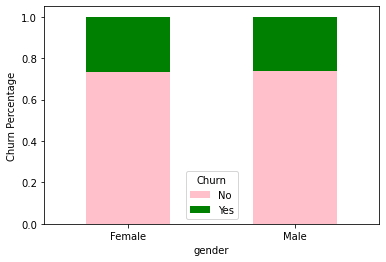

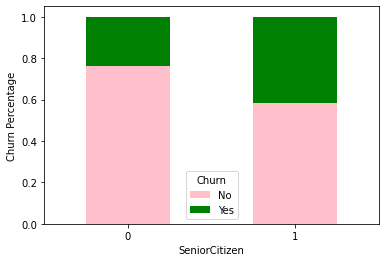

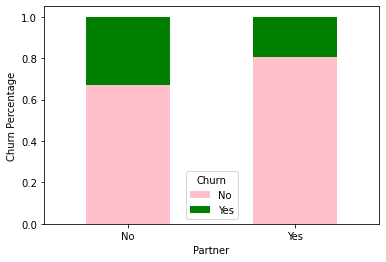

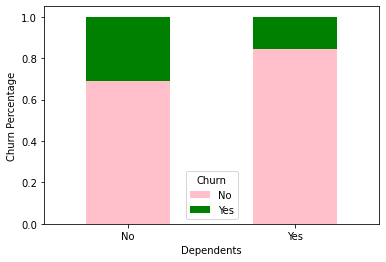

In [30]:
#Will check for gender, seniorcitizen, partner and dependents
stacked_plot(df, 'gender', 'Churn')
stacked_plot(df, 'SeniorCitizen', 'Churn')
stacked_plot(df, 'Partner', 'Churn')
stacked_plot(df, 'Dependents', 'Churn')

* Churn does not depend on gender.
* Churn is more if a customer is a Senior Citizen.
* Churn is lesser when the customer took a partner service with their partner.
* Churn is lesser when the customer has dependents.

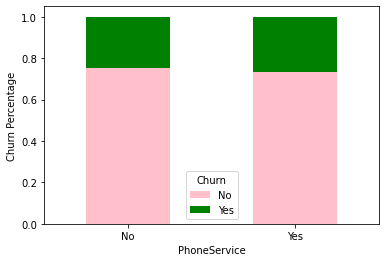

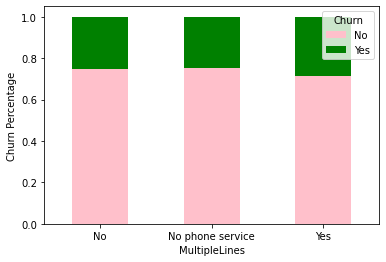

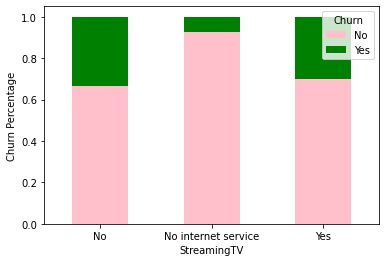

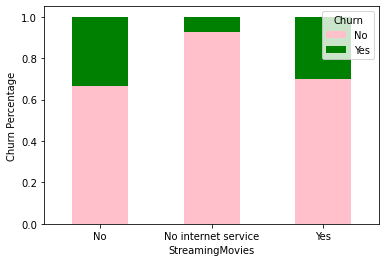

In [31]:
#Next will check for Phone service, Multiplelines, Streaming Tv and Streaming movies.
stacked_plot(df, 'PhoneService', 'Churn')
stacked_plot(df, 'MultipleLines', 'Churn')
stacked_plot(df, 'StreamingTV', 'Churn')
stacked_plot(df, 'StreamingMovies', 'Churn')

* Churn does not depened on Phone Service.
* Churn is slightly more if multiple line is taken.
* Churn is lesser for the ones with nmo internet services. But it also depeneds on other factors and not only on streaming TV or movies.

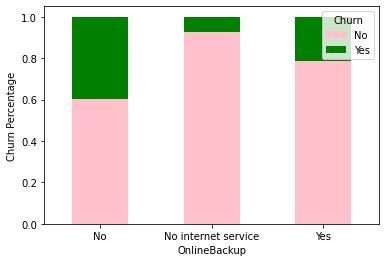

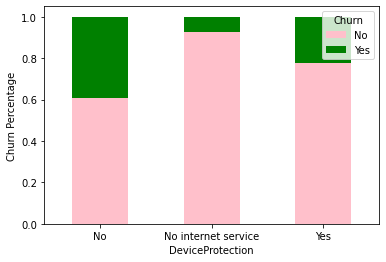

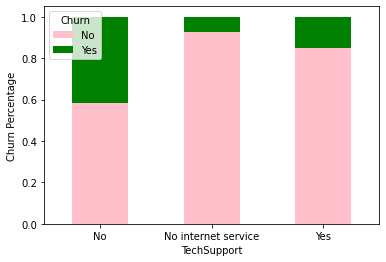

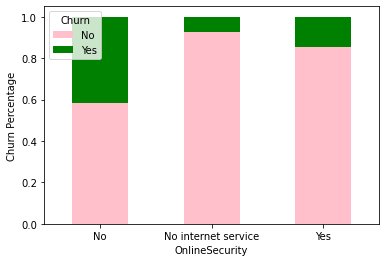

In [32]:
#Next will check for OnlineBackup, DeviceProtection, TechSupport and Online Security
stacked_plot(df, 'OnlineBackup', 'Churn')
stacked_plot(df, 'DeviceProtection', 'Churn')
stacked_plot(df, 'TechSupport', 'Churn')
stacked_plot(df, 'OnlineSecurity', 'Churn')

* In all the above graphs I can see that the churn is more when No internet service.

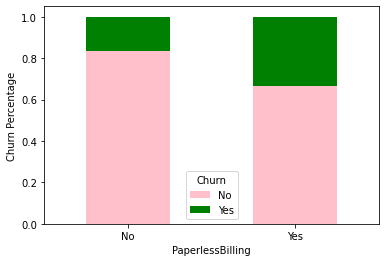

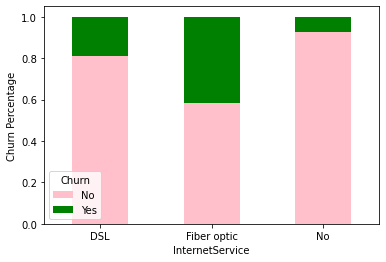

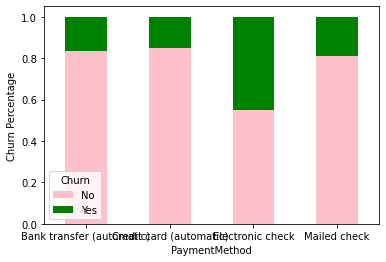

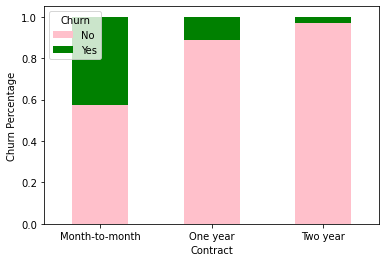

In [33]:
#Next will check for PaperBilling, InternetService, PaymentMethod and Contract
stacked_plot(df, 'PaperlessBilling', 'Churn')
stacked_plot(df, 'InternetService', 'Churn')
stacked_plot(df, 'PaymentMethod', 'Churn')
stacked_plot(df, 'Contract', 'Churn')

* There is more churn if Paperless Billing is opted.
* Churn least when no internet service and high if fiber optics is used by customer. This can be due to the expensive bill amount.
* Churn is more if customer opt for Electronic check method.
* Churn is least for 2 year contract customers and highest for month on month customers. 

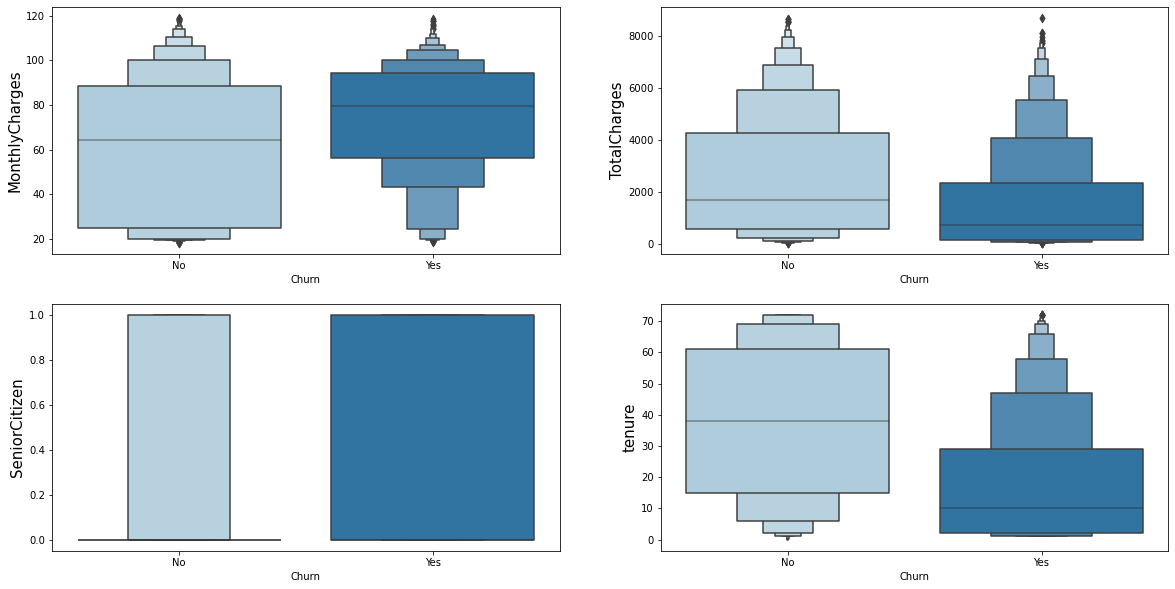

In [34]:
#Checking numerical column and Target relationship
plt.figure(figsize = (20,10))
plotnumber = 1

for i in df[num_cols]:
    if plotnumber <= 4:
        ax = plt.subplot(2,2, plotnumber)
        sns.boxenplot(x = df.Churn, y = df[i], palette = 'Paired')
        plt.ylabel(i, fontsize = 15)
        
    plotnumber += 1
    
plt.show()

* Monthly charges of 25 to 85 are less likely to churn than others but incase of charges from 60 to 90 chances of churn is more.
* Customers with yearly charges of 200 to 2100 are more prone to churn than others.
* Senior citizen tend to churn more.
* Cutomer with tune 5 to 25 months are more likely to churn than others.
* Customers with higher tenure are less likely to churn.

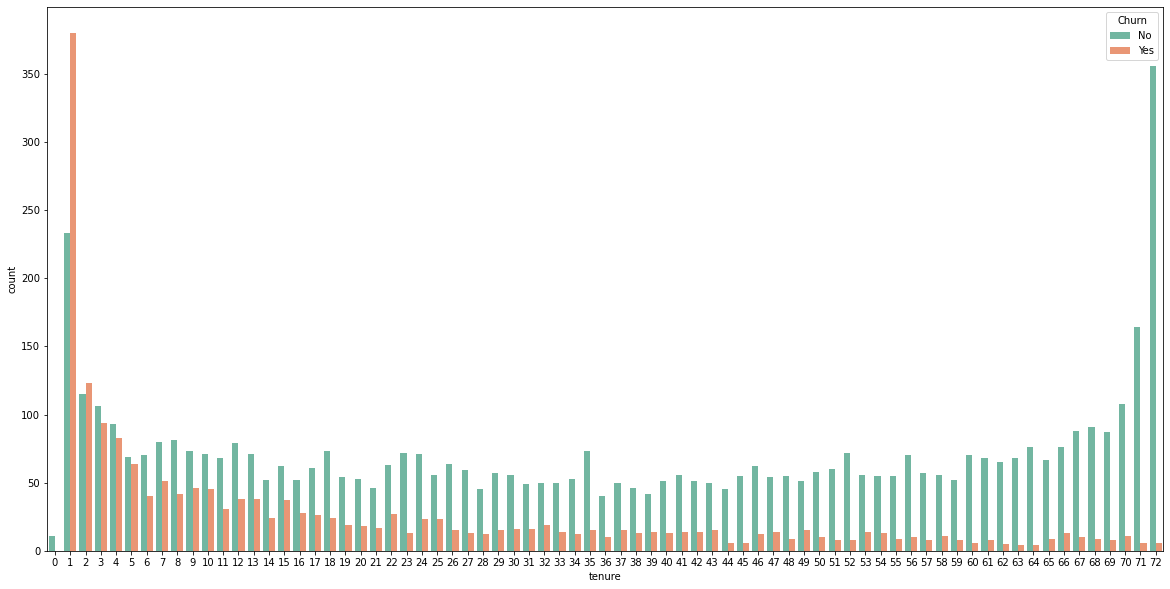

In [35]:
#Will plot a countplot to check the relationship of tenure and churn in detailed.
plt.figure(figsize = (20,10))
sns.countplot(x = 'tenure', hue = 'Churn', palette = 'Set2', data = df)
plt.show()

* Tenure and Churn are negatively correlated as Tenure increases Churn reduces.
* Churn is at peak at 1st month of tenurity. 

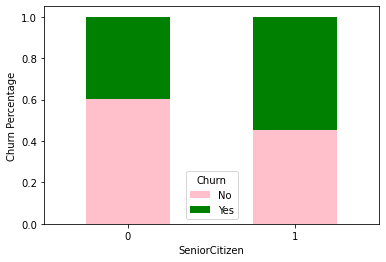

In [36]:
#Next will check for Senior citizen with contract and their churn
stacked_plot(df[df.Contract == 'Month-to-month'], 'SeniorCitizen', 'Churn')

* From above plot I can observe that Senior citizens with Month to month options are more likely to churn than non senior citizens.

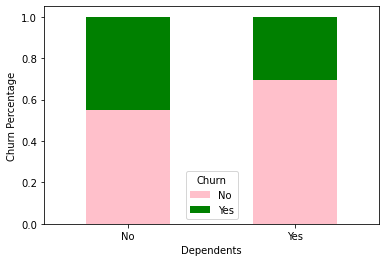

In [37]:
#Will check dependents and the internet service with churn
stacked_plot(df[df.InternetService == 'Fiber optic'], 'Dependents', 'Churn')

* Customers with dependents churn is lesser when fiber optic is used.

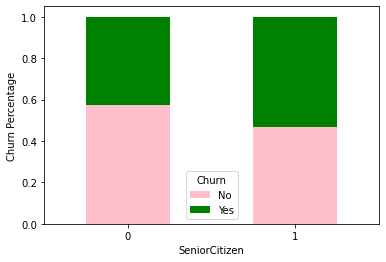

In [38]:
#Will check dependents and the internet service with churn
stacked_plot(df[df.PaymentMethod == 'Electronic check'], 'SeniorCitizen', 'Churn')

* Customer churn is more for senior citizens than non senior citizens if payment method is Electronic check.

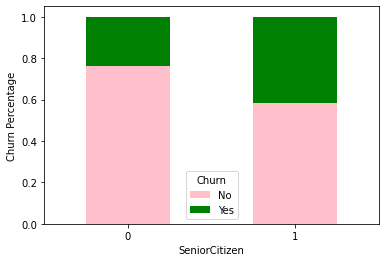

In [39]:
#Let's check senior citizen with churn
stacked_plot(df, 'SeniorCitizen', 'Churn')

* Churn is more for Senior citizens than non Senior citizens.

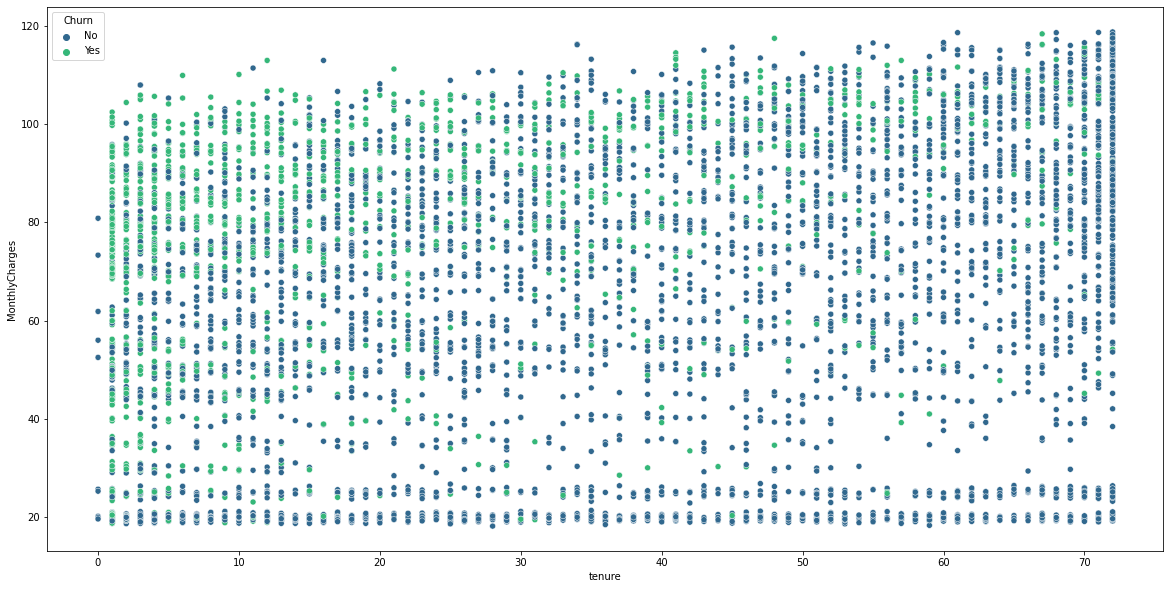

In [40]:
#Let's check scatter plot of Monthly charges and tenure with churn
plt.figure(figsize = (20,10))
sns.scatterplot(df['tenure'], df['MonthlyCharges'], hue = df['Churn'], palette = 'viridis')
plt.show()

* Churn is more for lower tenure and higher monthly charges.
* As tenure increases churn decreases when monthly charges are less.
* Churn can be seen at higher monthly charges.

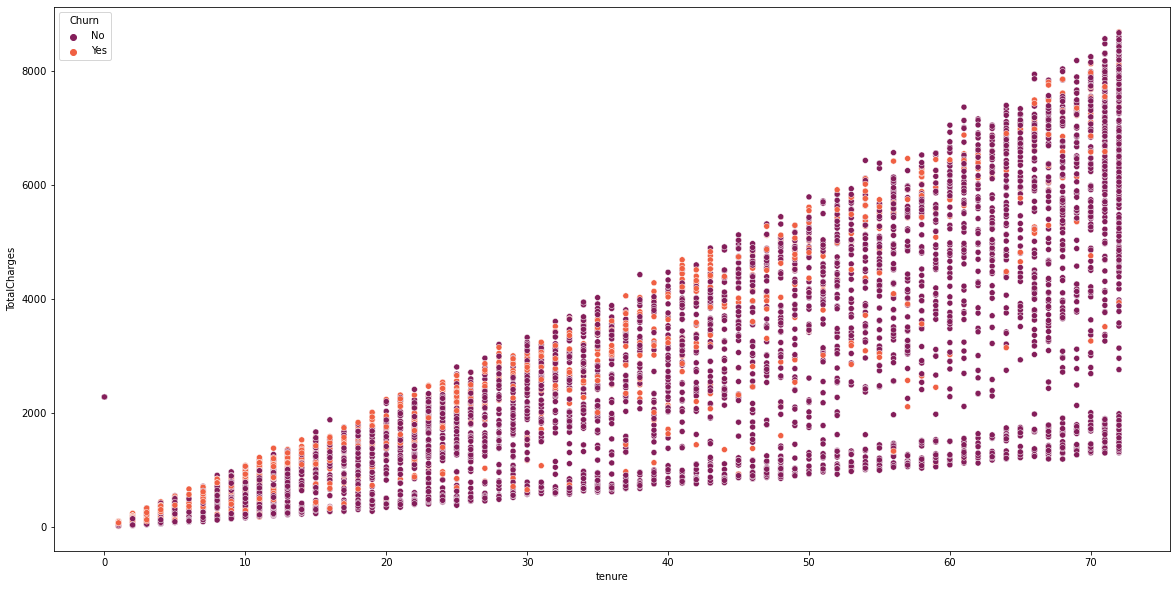

In [41]:
#Let's check scatter plot of Total charges and tenure with churn
plt.figure(figsize = (20,10))
sns.scatterplot(df['tenure'], df['TotalCharges'], hue = df['Churn'], palette = 'rocket')
plt.show()

* I can obseve strong positive relationship for tenure, Total charges and churn.
* As tenure increases so do Total charges.
* Churn is more at tenures less than  months.
* Churn is lesser at when tenure is more and that to happens only at higher charges.

# Multivarite Analysis

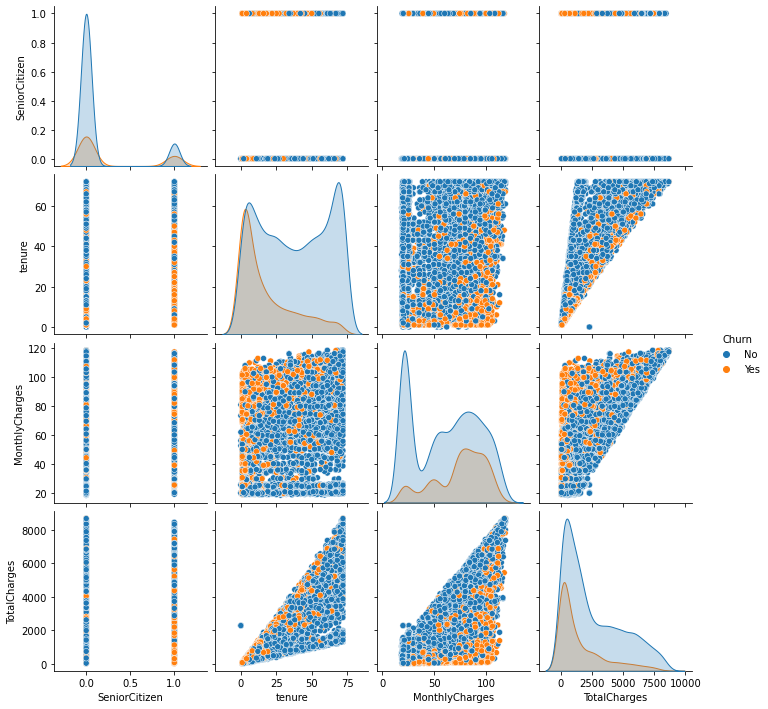

In [42]:
#Pair ploting for target
sns.pairplot(df, hue = 'Churn', palette = 'tab10')
plt.show()

# Outliers

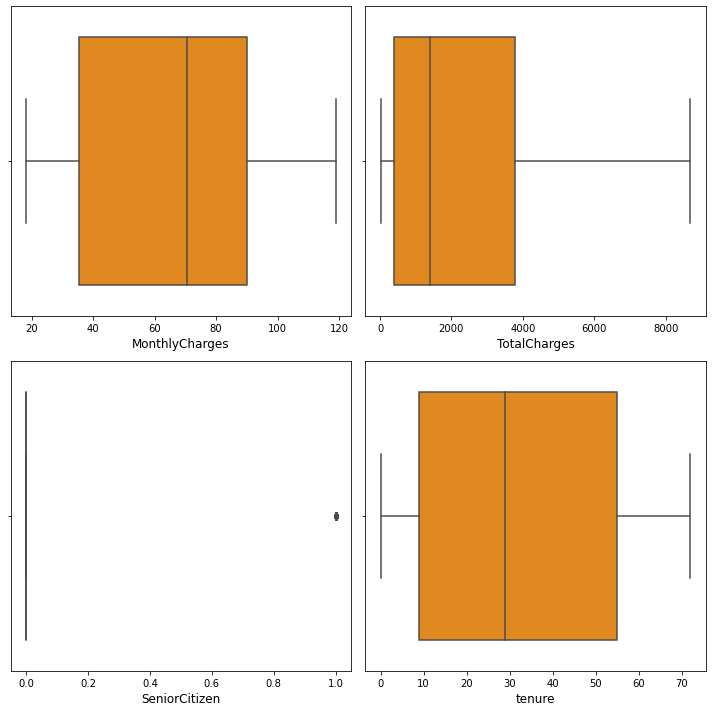

In [43]:
#Identifying the outliers
plt.figure(figsize = (10,10))
plotnumber = 1

for column in num_cols:
        plt.subplot(2,2, plotnumber)
        sns.boxplot(df[column], color = 'darkorange')
        plt.xlabel(column, fontsize = 12)
        plotnumber += 1
        plt.tight_layout()

* In above senior citizen box plot we can outliers but we can ignore that as it is a categorical feature with Yes or No (0/1) options.

# Skewness

In [44]:
#Checking skewness for the dataset
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

* We have skewness in Senior citizen and Total charges, however only Totak charges skewness needs to be fixed as Senior citizen is a categorical fearure.

In [45]:
#Using power transformer to remove skewness from Total Charges
cols = ['TotalCharges']

transform = PowerTransformer(method = 'yeo-johnson')
df[cols] = transform.fit_transform(df[cols].values)

In [46]:
#Checking dataset skewness after using power transformer
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

* Skewness have been removed successfully.

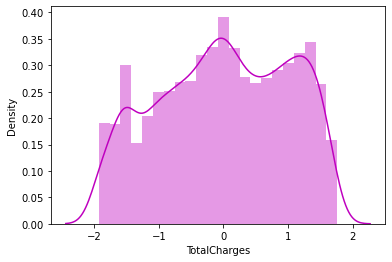

In [47]:
#Checking distribution of Total Charges after removing skewness
sns.distplot(df['TotalCharges'], color = 'm')
plt.show()

# Encoding

In [48]:
#Separating categorical columns from the dataset
cat_cols = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_cols.append(i)
print(cat_cols)    

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [49]:
#Encoding using Ordinal Encoder
enc = OrdinalEncoder()

for i in cat_cols:
    df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0


* All features are now in numerical value.

# Correlation

In [51]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.242515,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.344209,-0.195525


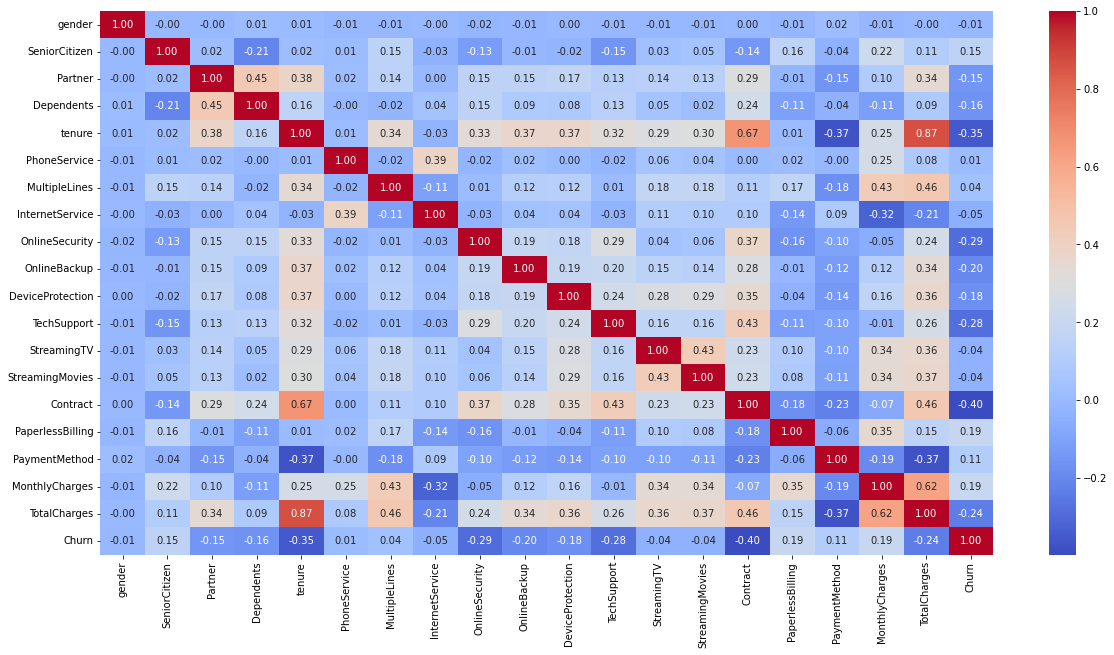

In [52]:
#Using heatmap to check correlation between features and label
corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

* I can see Multicollinearity issue is there in this dataset.
* Features Tenure and Total charges are correlated.
* I can see Multicollinearity issue beteween tenure and Contract.
* Multicollinearity issue between Monthly charges and Total charges.
* Target variable Churn is highly correleated with Contract followed by tenure.
* Churn is least correlated with gender and phone service.

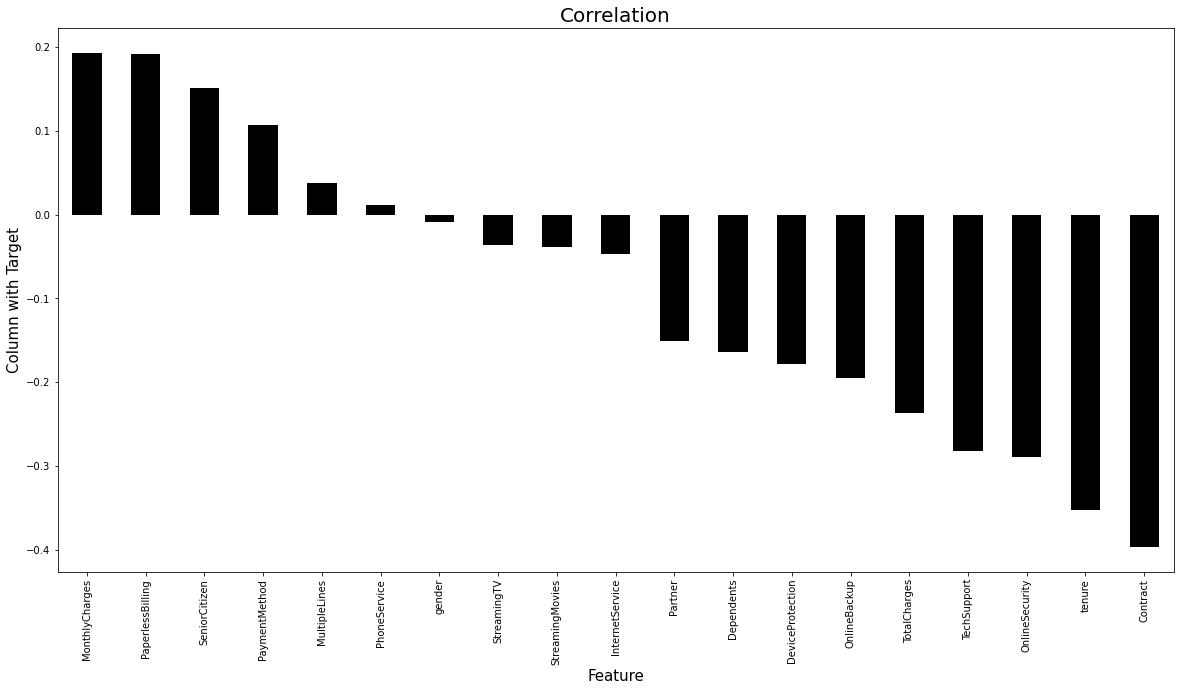

In [53]:
#Visualizing correlation
plt.figure(figsize = (20,10))
df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind = 'bar', color = 'black')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Column with Target', fontsize = 15)
plt.title('Correlation', fontsize = 20)
plt.show()

* Churn is mostly correlated with Monthly Charges and PaperlessBilling.
* Phone Service and Gender has least contribution towards target variable Churn.

# Spliting dataset

In [54]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [55]:
x.shape

(7043, 19)

In [56]:
y.shape

(7043,)

# Standardization

In [57]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

In [58]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.250118


# Multicollinearity using VIF

In [59]:
# Checking multicollinearity problem using VIF
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.001684,gender
1,1.149730,SeniorCitizen
2,1.463075,Partner
3,1.384396,Dependents
4,10.690306,tenure
5,1.622399,PhoneService
6,1.397403,MultipleLines
7,1.866643,InternetService
8,1.252550,OnlineSecurity
9,1.188767,OnlineBackup


* We have multicollinearity in tenure and total charges, earlier we have seen total charges and monthly charges are correlated and monthly charges are present in the dataset with low VIF value so I will drop Total charges here.

In [60]:
#Droping Total Charges
x = x.drop(['TotalCharges'], axis = 1)

In [61]:
# Checking VIF after removing Total charges
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


* Multicollinearity issue have been resolved.

# SMOTE() for Imbalance Datset 

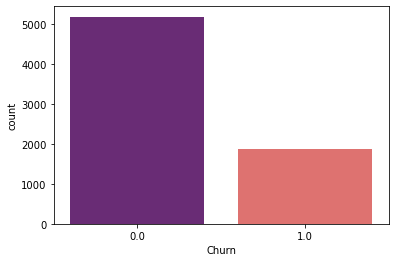

In [62]:
#Printing count of Churn
sns.countplot(y, palette = 'magma')
plt.show()

* We have imbalanced dataset of target variable.

In [63]:
#Using Smote to balance out dataset
smt = SMOTE()
x,y = smt.fit_resample(x,y)

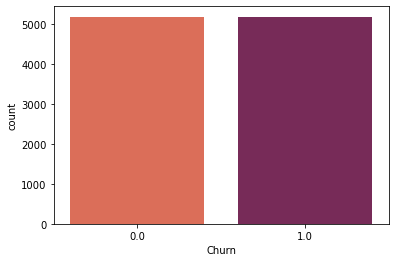

In [64]:
#Checking target variable again after using SMOTE
sns.countplot(y, palette = 'rocket_r')
plt.show()

* We have successfully balances out the dataset.

# PCA - Principle Component Analysis

In [65]:
pca = PCA()
principle_comp = pca.fit_transform(x)

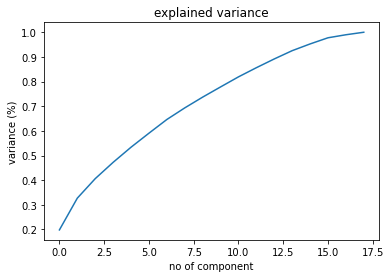

In [66]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

* Graph shows 14 components has explained 98% - 99% variance of all features, so will use 14.

In [67]:
pca = PCA(n_components = 14)

In [68]:
x = pca.fit_transform(x)
x

array([[-1.85438633,  0.83041866,  3.01404665, ..., -0.48466627,
        -0.04347216,  0.08336651],
       [-0.77535706,  1.79738821,  0.21539866, ...,  1.0029496 ,
        -1.32318571, -0.27242967],
       [-1.97082702,  0.99017796,  0.50726945, ...,  0.68081891,
        -1.49392629,  0.08176127],
       ...,
       [-1.67676218, -2.51034914,  0.0422133 , ..., -0.40369675,
        -0.02456991,  1.44369365],
       [ 1.49763242,  0.10471595, -0.57578109, ..., -0.09269238,
         0.91334086,  0.30989347],
       [-3.10402965,  1.15699944,  0.00349526, ...,  1.03666962,
         0.50343912, -0.04374956]])

# Model Building

In [69]:
#Find best Random_state
maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x, y, random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.785024154589372 on Random State = 59


In [70]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 97)

In [71]:
LR_model = LogisticRegression()
RD_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
XGB_model = XGBClassifier()
SGH_model = SGDClassifier()
Bag_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

model = [LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model]

In [72]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 77.05314009661835
Confusion Matrix of  LogisticRegression()  is 
 [[785 262]
 [213 810]]
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      1047
         1.0       0.76      0.79      0.77      1023

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070

**************************************************
Accuracy_Score of  RidgeClassifier() is 77.487922705314
Confusion Matrix of  RidgeClassifier()  is 
 [[769 278]
 [188 835]]
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.77      1047
         1.0       0.75      0.82      0.78      1023

    accuracy                           0.77      2070
   macro avg       0.78      0.78      0.77      2070
weighted avg       0.78      0.77      0.77      2070

***************************************

In [73]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, x, y, cv = 5, scoring = 'accuracy').mean() * 100)
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 77.05314009661835
cross Validation accuracy score of  LogisticRegression()  is  76.20818477502024
**************************************************
Accuracy_Score of  RidgeClassifier() is 77.487922705314
cross Validation accuracy score of  RidgeClassifier()  is  75.91824564598642
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 75.74879227053141
cross Validation accuracy score of  DecisionTreeClassifier()  is  76.57562873146962
**************************************************
Accuracy_Score of  SVC() is 78.88888888888889
cross Validation accuracy score of  SVC()  is  77.99601665254049
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 78.59903381642512
cross Validation accuracy score of  KNeighborsClassifier()  is  78.21822019552494
**************************************************
Accuracy_Score of  RandomForestClassifier() is 83.71980676328502
c

* Random Forest Classifier has given the best accuracy score which is 83% in all models.

# Next will check ROC AUC curve for the fitted model

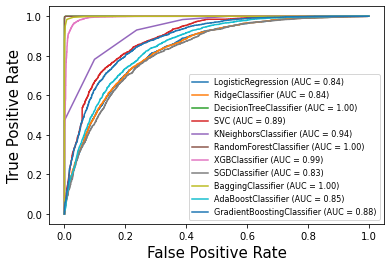

In [74]:
#Let's see how well our model works on training data.
disp = plot_roc_curve(LR_model,x_train,y_train)

plot_roc_curve(RD_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(DT_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(SV_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(KNR_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(RFR_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(XGB_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(SGH_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(Bag_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(ADA_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(GB_model, x_train, y_train, ax = disp.ax_)

plt.legend(prop = {'size': 8}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()

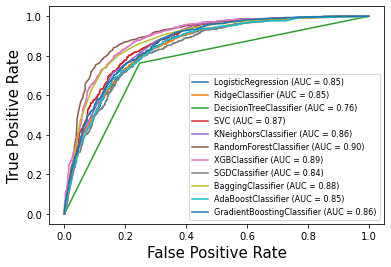

In [75]:
#Let's see how well our model works on test data.
disp = plot_roc_curve(LR_model, x_test, y_test)

plot_roc_curve(RD_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(DT_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(SV_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(KNR_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(RFR_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(XGB_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(SGH_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(Bag_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(ADA_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(GB_model, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size': 8}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()

# Hyper Tuning Random Forest Classifier

In [76]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[13,15,17],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6],
    'min_samples_split':[10,11],
}
grd = GridSearchCV(RFR_model, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 17}


In [77]:
Tuned_RFR_model = grd.best_estimator_
Tuned_RFR_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=17)

In [78]:
#Model Confidence/Accuracy
print('Accuracy_Score of Tuned Random Forest Model is', accuracy_score(y_test,Tuned_RFR_model.predict(x_test))*100)
print("Cross Validation accuracy score of Tuned Random Forest model is ",cross_val_score(Tuned_RFR_model, x, y, cv = 5, scoring = 'accuracy').mean() * 100)

Accuracy_Score of Tuned Random Forest Model is 81.35265700483092
Cross Validation accuracy score of Tuned Random Forest model is  80.37339329368665


* I will save the original model as tuned model accuracy is not satisfactory.

In [79]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(RFR_model, open('Churn_model', 'wb'))

In [80]:
#Loading saved model
loaded_model = pickle.load(open('Churn_model','rb'))

In [81]:
Churn = loaded_model.predict(x_test)
Churn

array([1., 0., 1., ..., 1., 0., 1.])

In [84]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
churn = pd.DataFrame({'Actual Churn': y_test, 'Predicted Churn': Churn})
churn.head()

,Actual Churn,Predicted Churn
9339,1.0,1.0
1343,0.0,0.0
9972,1.0,1.0
3364,1.0,1.0
2590,0.0,0.0


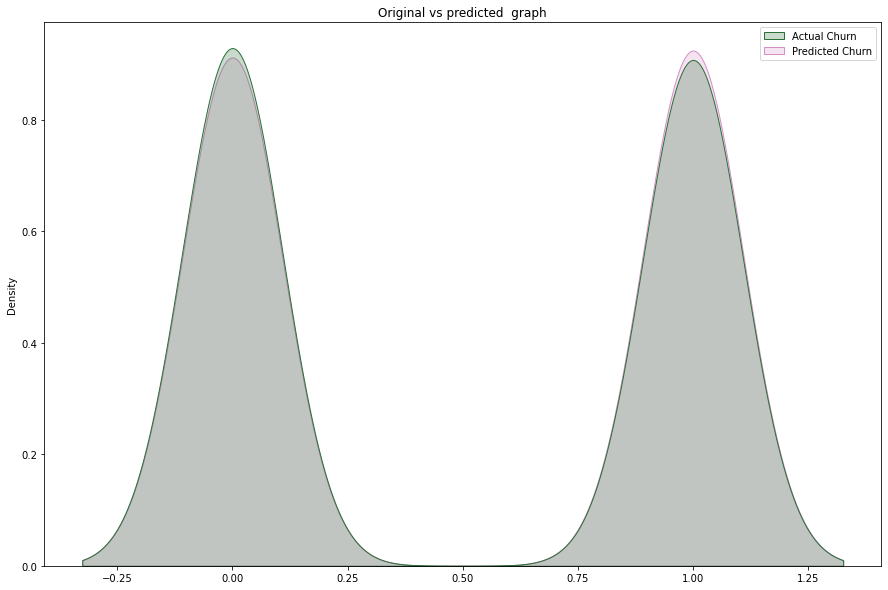

In [86]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = churn, palette = 'cubehelix', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()